In [11]:
from google.colab import files
uploaded = files.upload()

Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (2).csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('nba_advanced_stats_2024_2025.csv')
df.columns = df.columns.str.strip()  # Clean column names
df.columns.tolist()  # Optional: view actual columns


['Player',
 'PER',
 'TS%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [14]:
# Drop only existing columns: USG%, TS%, BPM
df = df.dropna(subset=['USG%', 'TS%', 'BPM'])


In [15]:
df_impactful = df[
    (df['USG%'] > 22) &
    (df['TS%'] > 0.55) &
    (df['BPM'] > 1.0)
].copy()

df_impactful = df_impactful.sort_values(by='USG%', ascending=False)
df_impactful.head()


,Player,PER,TS%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
731,James Wiseman,31.2,0.615,42.2,0.0,0.0,0.0,0.237,6.0,-4.4,1.6,0.0
619,MarJon Beauchamp,29.8,0.588,35.2,0.1,0.0,0.1,0.254,3.4,0.3,3.7,0.0
45,Giannis Antetokounmpo,30.5,0.625,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6
19,Shai Gilgeous-Alexander,30.7,0.637,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9
367,Zion Williamson,27.3,0.600,34.7,1.9,0.6,2.5,0.141,5.9,1.0,7.0,1.9


In [16]:
df_impactful.to_csv('complex_high_usage_players_2024_2025.csv', index=False)


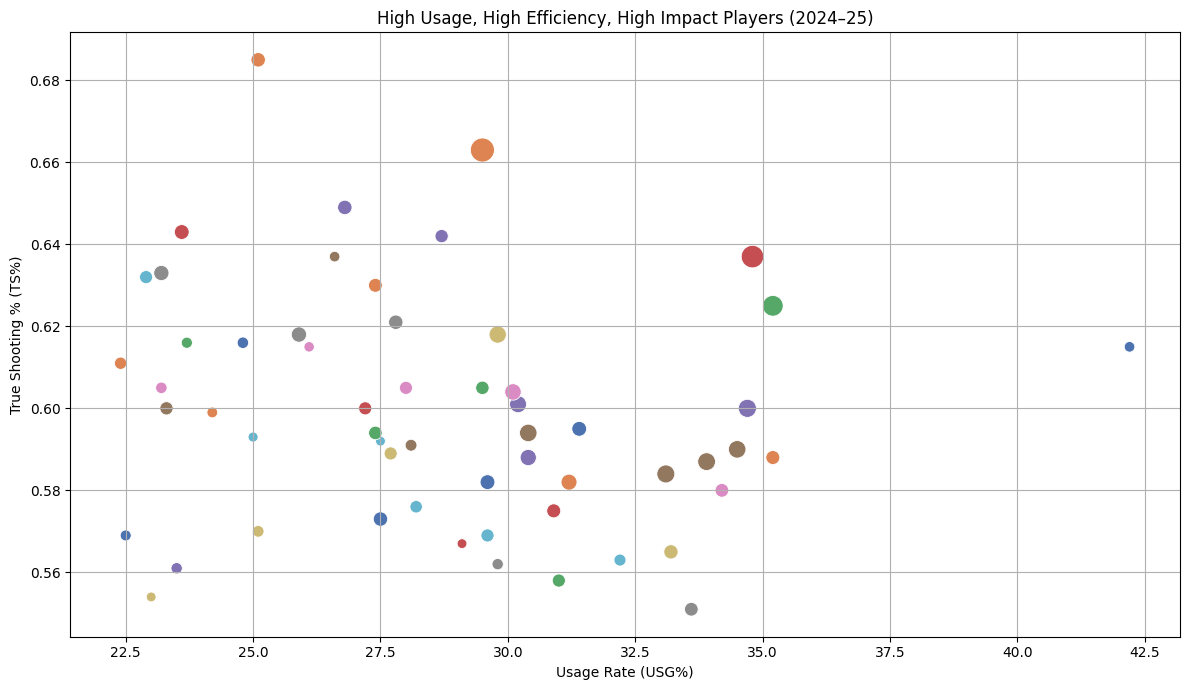

In [17]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_impactful,
    x='USG%', y='TS%', size='BPM', hue='Player',
    palette='deep', sizes=(50, 300), legend=False
)
plt.title('High Usage, High Efficiency, High Impact Players (2024–25)')
plt.xlabel('Usage Rate (USG%)')
plt.ylabel('True Shooting % (TS%)')
plt.grid(True)
plt.tight_layout()
plt.show()